# 1. Loading and Preprocessing

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with feature data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Show the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# 2. Clustering Algorithm Implementation

## KMeans is an unsupervised learning algorithm that partitions data into k clusters by:

Randomly selecting k initial centroids.

Assigning each data point to the nearest centroid.

Updating centroids as the mean of assigned points.

Repeating steps 2–3 until convergence (centroids no longer change).

## Why is KMeans suitable for the Iris dataset?
The Iris dataset contains continuous numeric features, making it ideal for KMeans.

There are 3 species, so setting k=3 aligns well with the natural clustering.

The dataset is relatively clean and balanced, which helps KMeans perform efficiently.

C:\Users\AMAN MUJEEB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


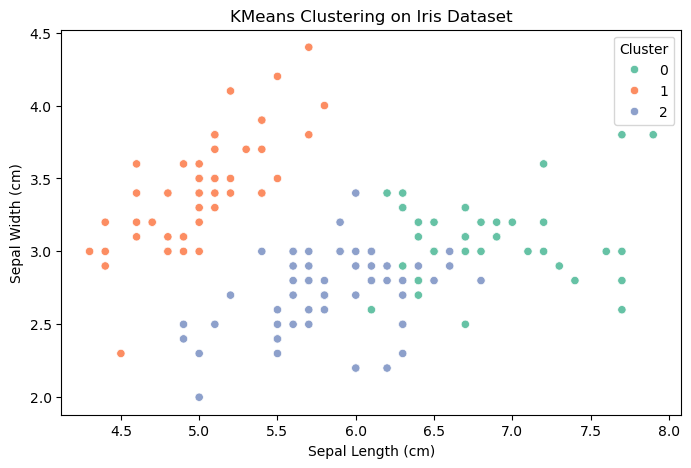

In [7]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Optional: Avoid memory leak warning

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Visualize using first two features
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Cluster")
plt.show()


## Hierarchical Clustering

## Hierarchical clustering builds a tree of clusters (dendrogram) using two approaches:

Agglomerative (Bottom-Up): Start with each data point as its own cluster and iteratively merge the closest clusters.

Divisive (Top-Down): Start with all points in one cluster and split recursively.

## Why Suitable for Iris Dataset:
Useful for exploring hierarchical relationships between samples.

Iris has a moderate size, making hierarchical methods computationally feasible.

Can reveal sub-cluster structure within species.

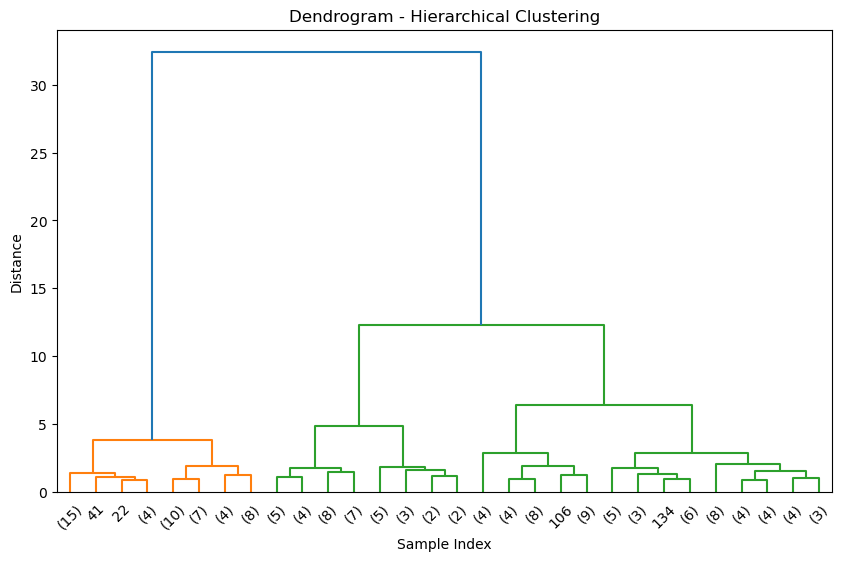

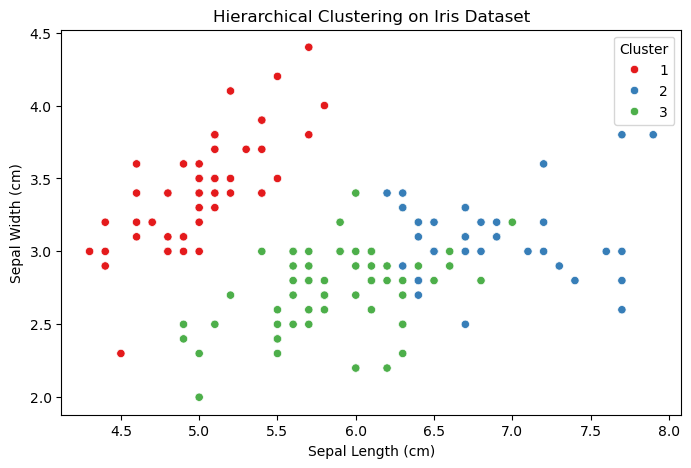

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Create linkage matrix using 'ward' method
linkage_matrix = linkage(df.iloc[:, :-1], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Cut tree to form 3 clusters
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Hierarchical_Cluster'], palette='Set1')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Cluster")
plt.show()
